In [22]:
# -----------------------------------------------------------
# Mirai22K Gold Price Movement Prediction - Sample Usage Notebook
# -----------------------------------------------------------
# This notebook demonstrates how to load and use a pre-trained
# binary classification model (gold_prob_model.pkl) to predict
# the directional movement (increase/decrease) of gold spot prices.
# The model is built using macroeconomic and market indicators
# as input features, and outputs both class prediction and
# probabilistic confidence.

# Author: Divjot Singh
# License: Apache-2.0 License
# -----------------------------------------------------------

# Core dependencies
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Evaluation tools (used in later cells if needed)
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Display settings for better clarity
pd.set_option('display.precision', 4)
sns.set(style="whitegrid")


In [23]:
# -----------------------------------------------------------
# Load Pre-trained Model and Inspect Expected Input Schema
# -----------------------------------------------------------

# Load the binary classification model from local file
model = joblib.load("gold_prob_model.pkl")

# Extract expected input features used during model training
expected_features = model.feature_names_in_

# Display feature schema for transparency
print("✅ Model loaded successfully.")
print("📌 Expected Features:")
for i, feat in enumerate(expected_features, 1):
    print(f"{i:>2}. {feat}")


✅ Model loaded successfully.
📌 Expected Features:
 1. Spot_Price
 2. DXY
 3. TNX
 4. ret_1
 5. ret_5
 6. dxy_ret
 7. tnx_diff
 8. dxy_lag1
 9. tnx_lag1
10. dxy_lag2
11. tnx_lag2
12. dxy_lag5
13. tnx_lag5


In [24]:
# -----------------------------------------------------------
# Sample Inference: Generate Prediction Using Test Input
# -----------------------------------------------------------

# Create a sample test case (replace values as needed for real inference)
sample_data = pd.DataFrame([[
    1925.4,   # Spot_Price (USD/oz)
    103.1,    # DXY (U.S. Dollar Index)
    4.12,     # TNX (10Y Treasury Yield)
    0.0012,   # ret_1 (1-day return)
    0.0051,   # ret_5 (5-day return)
    -0.0021,  # dxy_ret (DXY daily return)
    0.01,     # tnx_diff (TNX daily difference)
    102.9,    # dxy_lag1
    4.08,     # tnx_lag1
    103.0,    # dxy_lag2
    4.02,     # tnx_lag2
    103.3,    # dxy_lag5
    3.97      # tnx_lag5
]], columns=expected_features)

# Run prediction
prediction = model.predict(sample_data)[0]
proba = model.predict_proba(sample_data)[0][1]

# Display results
print("📈 Predicted Class  :", "⬆️ Increase" if prediction == 1 else "⬇️ Decrease")
print("🎯 Confidence Score :", round(proba * 100, 2), "%")


📈 Predicted Class  : ⬆️ Increase
🎯 Confidence Score : 67.85 %


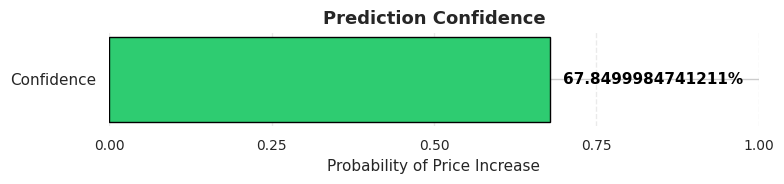

In [25]:
# -----------------------------------------------------------
# Visualize Prediction Confidence
# -----------------------------------------------------------

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
bar_color = '#2ecc71' if prediction == 1 else '#e74c3c'
plt.barh(['Confidence'], [proba], color=bar_color, edgecolor='black', height=0.5)

plt.xlim(0, 1)
plt.xticks([0, 0.25, 0.5, 0.75, 1], fontsize=10)
plt.yticks(fontsize=11)
plt.title("Prediction Confidence", fontsize=13, fontweight='bold')
plt.xlabel("Probability of Price Increase", fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Annotate confidence value
plt.text(proba + 0.02, 0, f"{round(proba * 100, 2)}%", va='center', fontsize=11, fontweight='bold', color='black')

plt.box(False)
plt.tight_layout()
plt.show()
